# import packages

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# load dataset

Read the CSV data into a DataFrame, define -1 values as None

In [66]:
path = "../data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv"
df = pd.read_csv(path, na_values=-1)

# data exploration

In [50]:
# Shape of the dataset
shape = df.shape

# Data types of the columns
data_types = df.dtypes

# Check for missing values
missing_values = df.isnull().sum()

# Descriptive statistics of the numerical columns
descriptive_stats = df.describe()

# Count of unique values for each column
unique_counts = df.nunique()

# shape, data_types, missing_values, unique_counts
descriptive_stats

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,61352.0,61352.000000,61352.000000,61352.000000,60904.000000,60002.000000,60002.000000,61352.000000,61352.000000,61352.000000,61038.000000,61329.000000,61239.000000,61347.000000,55854.000000,55568.000000
mean,2022.0,1.450368,1.333779,1.482299,1.386214,37.517866,6.452135,2.783039,0.800316,0.645325,0.228333,0.048900,0.034765,9.476013,1.296863,4.893266
std,0.0,1.109855,0.981507,0.735614,0.496238,18.950720,2.231875,0.442318,2.197167,2.009611,0.610414,0.426015,0.257770,16.663137,0.650865,2.782122
min,2022.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2022.0,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2022.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2022.0,2.000000,1.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2022.0,227.000000,148.000000,3.000000,9.000000,101.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


Check for outliers or inconsistencies For numerical columns and boxplot

C:\Users\ROG\AppData\Local\Temp\ipykernel_14968\3191936170.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


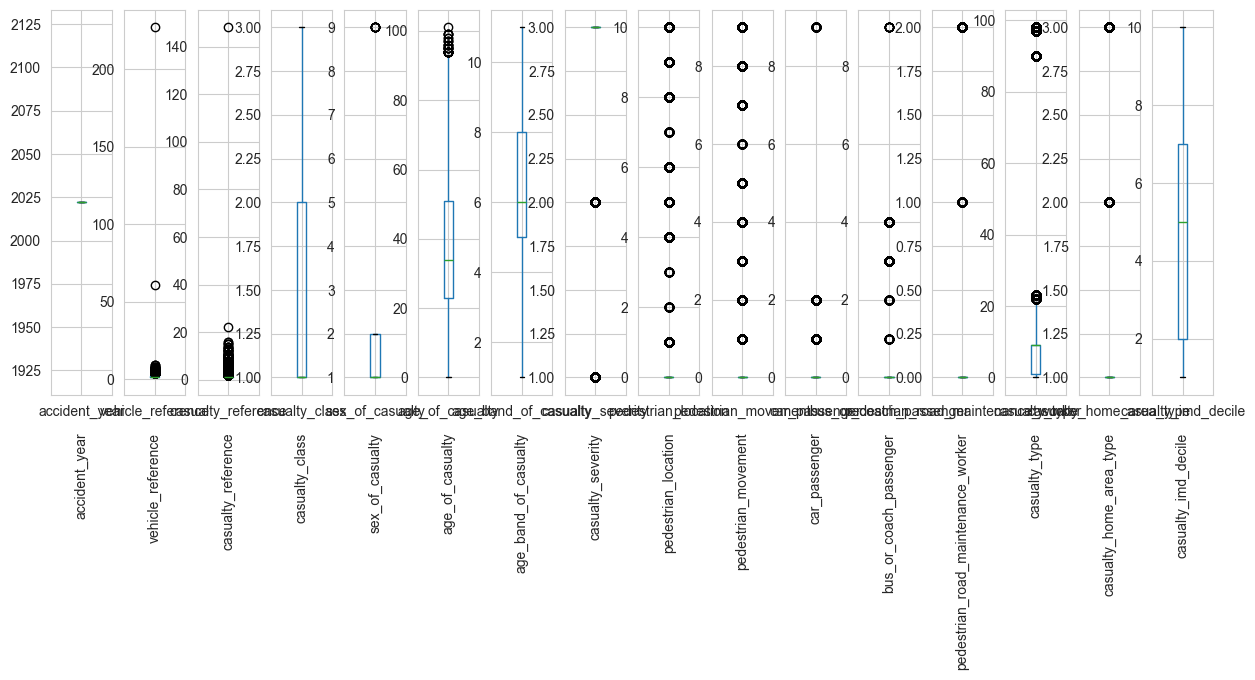

In [67]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_xlabel(column, rotation=90, labelpad=10)  # Rotate x-axis labels by 90 degrees and place them above
    axes[i].tick_params(axis='x', bottom=False)  # Hide x-axis ticks

plt.tight_layout()
plt.show()


Calculate the range of diversity for each numerical column

In [68]:
diversity_ranges = {}
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numerical
        column_range = df[column].max() - df[column].min()
        diversity_ranges[column] = column_range + 1

# Print the range of diversity for each numerical column
for column, diversity_range in diversity_ranges.items():
    print(f"Range of diversity for '{column}': {diversity_range}")

Range of diversity for 'accident_year': 1
Range of diversity for 'vehicle_reference': 227
Range of diversity for 'casualty_reference': 148
Range of diversity for 'casualty_class': 3
Range of diversity for 'sex_of_casualty': 9.0
Range of diversity for 'age_of_casualty': 102.0
Range of diversity for 'age_band_of_casualty': 11.0
Range of diversity for 'casualty_severity': 3
Range of diversity for 'pedestrian_location': 11
Range of diversity for 'pedestrian_movement': 10
Range of diversity for 'car_passenger': 10.0
Range of diversity for 'bus_or_coach_passenger': 10.0
Range of diversity for 'pedestrian_road_maintenance_worker': 3.0
Range of diversity for 'casualty_type': 99.0
Range of diversity for 'casualty_home_area_type': 3.0
Range of diversity for 'casualty_imd_decile': 10.0


# Data preprocessing

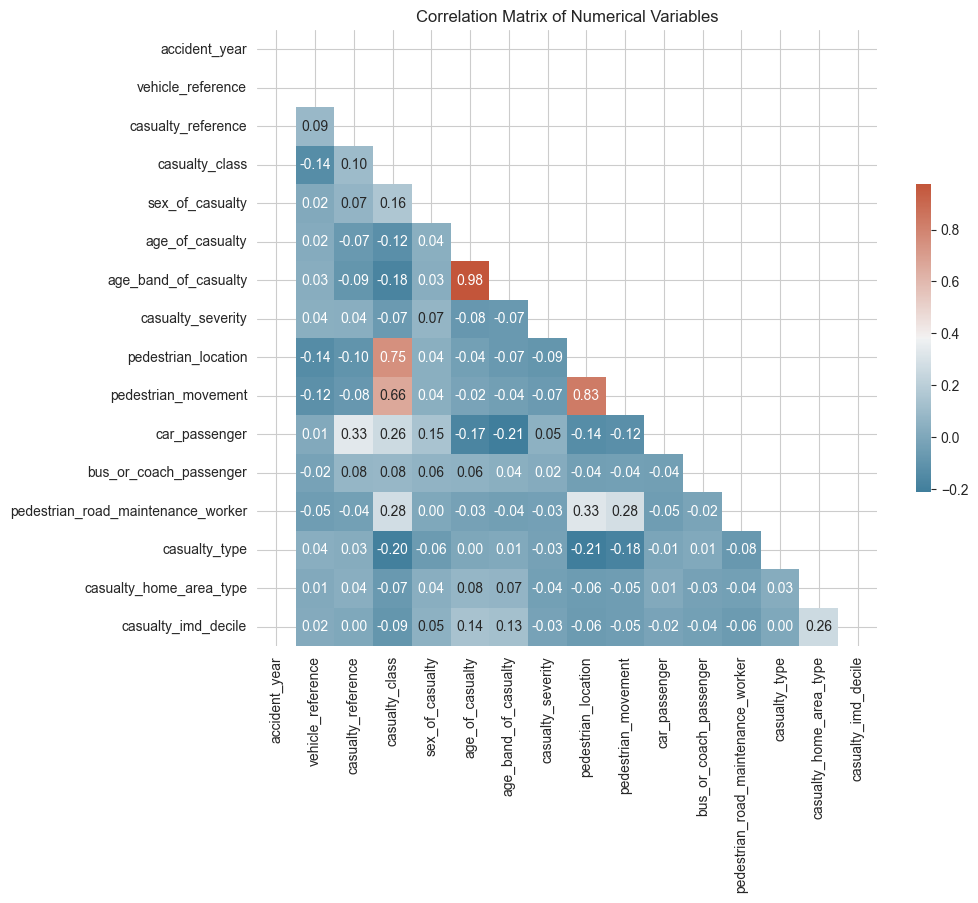

In [70]:
df_numeric = df.select_dtypes(exclude=['object'])
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap=cmap, cbar_kws={"shrink": .5}, fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Data Cleaning

In [71]:
df.drop(columns=['accident_year', 'accident_reference', 'status'], inplace=True)
df.drop_duplicates(inplace=True)

Handle missing data

In [72]:
from sklearn.impute import SimpleImputer

# Impute missing values with mode
imputer_mode = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the data
df['sex_of_casualty'] = imputer_mode.fit_transform(df[['sex_of_casualty']])
df['casualty_type'] = imputer_mode.fit_transform(df[['casualty_type']])
df['car_passenger'] = imputer_mode.fit_transform(df[['car_passenger']])
df['bus_or_coach_passenger'] = imputer_mode.fit_transform(
    df[['bus_or_coach_passenger']])
df['pedestrian_road_maintenance_worker'] = imputer_mode.fit_transform(
    df[['pedestrian_road_maintenance_worker']])

# Impute missing values with median
imputer_median = SimpleImputer(strategy='median')

df['age_of_casualty'] = imputer_median.fit_transform(df[['age_of_casualty']])
df['age_band_of_casualty'] = imputer_median.fit_transform(
    df[['age_band_of_casualty']])
df.dropna(inplace=True)


In [56]:
df['car_passenger']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
61346    0.0
61347    0.0
61349    0.0
61350    0.0
61351    0.0
Name: car_passenger, Length: 53325, dtype: float64

remove outliers

In [73]:
df = df[(df['vehicle_reference'] != 227) & (df['vehicle_reference'] != 61)]
df = df[(df['casualty_reference'] != 22) & (df['casualty_reference'] != 148)]


# Data Type Conversion

In [74]:
columns_to_convert = ['sex_of_casualty', 'age_of_casualty',
                      'age_band_of_casualty',
                      'car_passenger', 'bus_or_coach_passenger',
                      'pedestrian_road_maintenance_worker', 'casualty_type',
                      'casualty_home_area_type', 'casualty_imd_decile']

# Convert columns to int type
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Exploratory Data Analysis (EDA)

Plot the distribution of accident severities

C:\Users\ROG\AppData\Local\Temp\ipykernel_14968\145631682.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='casualty_severity', data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_14968\145631682.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='casualty_severity', data=df, palette=current_palette)


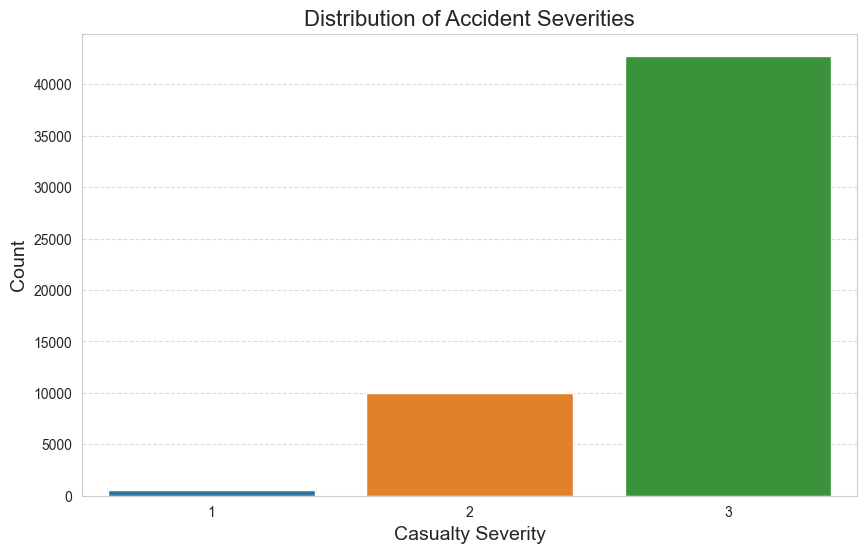

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

current_palette = sns.color_palette() 

plt.figure(figsize=(10, 6))
sns.countplot(x='casualty_severity', data=df, palette=current_palette)

plt.title('Distribution of Accident Severities', fontsize=16)
plt.xlabel('Casualty Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Compare the distribution of casualty severity across different demographic groups

1. Gender vs. Casualty Severity

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='sex_of_casualty', data=df, palette=current_palette)
plt.title('Casualty Severity by Gender')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Sex of Casualty', labels=['Male', 'Female'])
plt.show()

2. Age Band vs. Casualty Severity

In [ ]:
sns.countplot(x='age_band_of_casualty', hue='casualty_severity', data=df, order=sorted(df['age_band_of_casualty'].unique()), palette=current_palette)
plt.title('Casualty Severity by Age Band')
plt.xticks(rotation=45)
plt.show()

Plot the relationship between casualty severity and casualty class

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_class', data=df, palette=current_palette)
plt.title('Casualty Severity by Casualty Class')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Casualty Class', labels=['Driver', 'Passenger', 'Pedestrian'])
plt.show()

Plot the relationship between casualty severity and casualty's home area type

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_home_area_type', data=df, palette=current_palette)
plt.title('Casualty Severity by Home Area Type')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Home Area Type', labels=['Unknown', 'Urban', 'Semi-Urban', 'Rural'])
plt.show()

Plot the distribution of casualty types

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='casualty_type', data=df, palette=current_palette)
plt.title('Distribution of Casualty Types')
plt.xlabel('Casualty Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Plot the distribution of pedestrian location values

In [ ]:
pedestrian_movement_labels = {
    0: 'Not a Pedestrian',
    1: "Crossing from driver's nearside",
    2: 'Crossing from nearside - masked by parked or stationary vehicle',
    3: "Crossing from driver's offside",
    4: 'Crossing from offside - masked by parked or stationary vehicle',
    5: 'In carriageway, stationary - not crossing (standing or playing)',
    6: 'In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle',
    7: 'Walking along in carriageway, facing traffic',
    8: 'Walking along in carriageway, back to traffic',
    9: 'Unknown or other'
}

pedestrian_location_labels = {
    0: 'Not a Pedestrian',
    1: 'Crossing on pedestrian crossing facility',
    2: 'Crossing in zig-zag approach lines',
    3: 'Crossing in zig-zag exit lines',
    4: 'Crossing elsewhere within 50m. of pedestrian crossing',
    5: 'In carriageway, crossing elsewhere',
    6: 'On footway or verge',
    7: 'On refuge, central island or central reservation',
    8: 'In centre of carriageway - not on refuge, island or central reservation',
    9: 'In carriageway, not crossing',
    10: 'Unknown or other'
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.countplot(x='pedestrian_location', data=df, ax=axes[0], palette=current_palette)
axes[0].set_title('Distribution of Pedestrian Location Values')
axes[0].set_xlabel('Pedestrian Location')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(pedestrian_location_labels.values(), rotation=90)  # Add legend with rotated labels

sns.countplot(x='pedestrian_movement', data=df, ax=axes[1], palette=current_palette)
axes[1].set_title('Distribution of Pedestrian Movement Values')
axes[1].set_xlabel('Pedestrian Movement')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(pedestrian_movement_labels.values(), rotation=90)  # Add legend with rotated labels

plt.tight_layout()

plt.show()

Plot the relationship between pedestrian location, pedestrian movement and casualty severity

C:\Users\ROG\AppData\Local\Temp\ipykernel_14968\3371661314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pedestrian_location', y='casualty_severity', data=df, ax=axes[0], palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_14968\3371661314.py:4: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='pedestrian_location', y='casualty_severity', data=df, ax=axes[0], palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_14968\3371661314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pedestrian_movement', y='casualty_severity', data=df, ax=axes[1], palette=cu

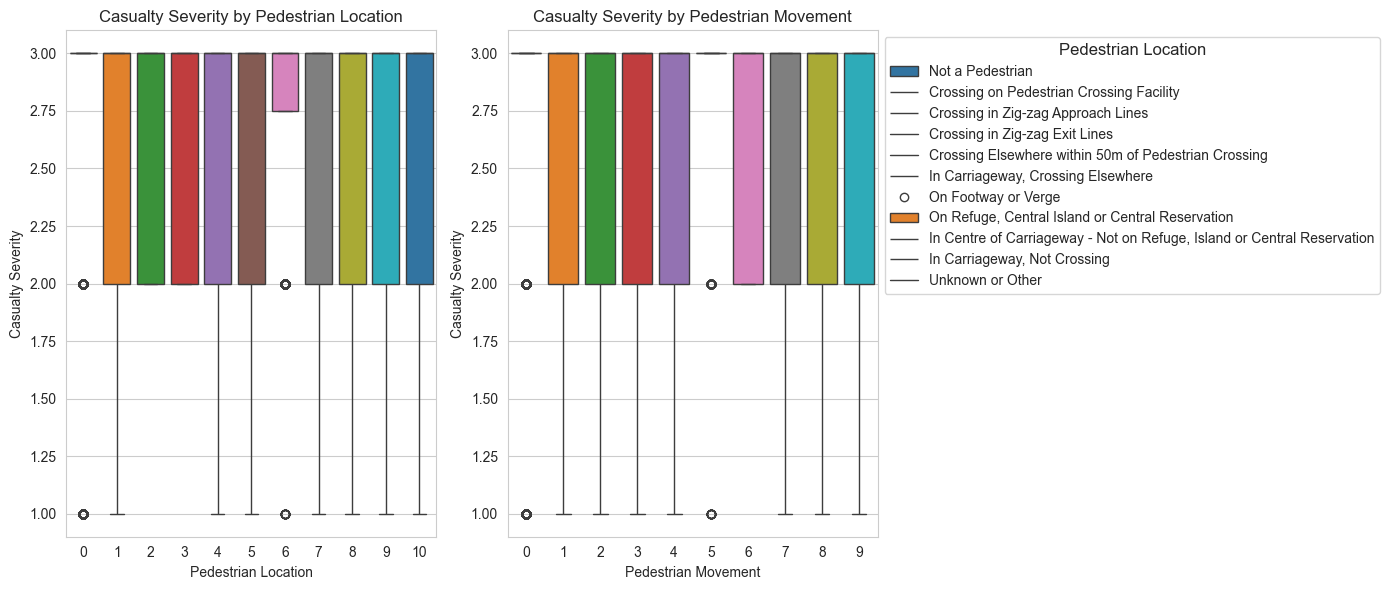

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the boxplot of casualty severity by pedestrian location
sns.boxplot(x='pedestrian_location', y='casualty_severity', data=df, ax=axes[0], palette=current_palette)
axes[0].set_title('Casualty Severity by Pedestrian Location')
axes[0].set_xlabel('Pedestrian Location')
axes[0].set_ylabel('Casualty Severity')

# Plot the boxplot of casualty severity by pedestrian movement
sns.boxplot(x='pedestrian_movement', y='casualty_severity', data=df, ax=axes[1], palette=current_palette)
axes[1].set_title('Casualty Severity by Pedestrian Movement')
axes[1].set_xlabel('Pedestrian Movement')
axes[1].set_ylabel('Casualty Severity')

# Add legend
legend_labels = ['Not a Pedestrian', 'Crossing on Pedestrian Crossing Facility', 'Crossing in Zig-zag Approach Lines',
                 'Crossing in Zig-zag Exit Lines', 'Crossing Elsewhere within 50m of Pedestrian Crossing',
                 'In Carriageway, Crossing Elsewhere', 'On Footway or Verge', 'On Refuge, Central Island or Central Reservation',
                 'In Centre of Carriageway - Not on Refuge, Island or Central Reservation', 'In Carriageway, Not Crossing',
                 'Unknown or Other']
legend = plt.legend(legend_labels, title='Pedestrian Location', loc='upper left', bbox_to_anchor=(1, 1))
plt.setp(legend.get_title(), fontsize=12)

plt.tight_layout()

plt.show()


Plot the distribution of accidents across age bands

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='age_band_of_casualty', data=df, palette=current_palette)
plt.title('Distribution of Accidents by Age Band of Casualty')
plt.xlabel('Age Band of Casualty')
plt.ylabel('Count')

legend_labels = ['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75']
legend = plt.legend(legend_labels, title='Age Band of Casualty', loc='upper left', bbox_to_anchor=(1, 1))
plt.setp(legend.get_title(), fontsize=12)

plt.show()


Plot the distribution of vehicle reference values

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='vehicle_reference', data=df, palette=current_palette)
plt.title('Distribution of Vehicle Reference Values')
plt.xlabel('Vehicle Reference')
plt.ylabel('Count')
plt.show()

Plot the distribution of Casualty_IMD_Decile values

In [ ]:
# Plot the distribution of Casualty IMD Decile values
plt.figure(figsize=(10, 8))
sns.countplot(x='casualty_imd_decile', data=df, palette=current_palette)
plt.title('Distribution of Casualty IMD Decile Values')
plt.xlabel('Casualty IMD Decile')
plt.ylabel('Count')

# Add legend
legend_labels = ['Most deprived 10%', 'More deprived 10-20%', 'More deprived 20-30%', 'More deprived 30-40%', 
                 'More deprived 40-50%', 'Less deprived 40-50%', 'Less deprived 30-40%', 'Less deprived 20-30%', 
                 'Less deprived 10-20%', 'Least deprived 10%']
legend = plt.legend(legend_labels, title='Casualty IMD Decile', loc='upper left', bbox_to_anchor=(1, 1))
plt.setp(legend.get_title(), fontsize=12)

plt.show()


Plot the distribution of Age_of_Casualty values

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['age_of_casualty'], bins=20, kde=True, palette=current_palette)
plt.title('Distribution of Age of Casualty')
plt.xlabel('Age of Casualty')
plt.ylabel('Count')
plt.show()

 bus or coach passenger categories

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bus_or_coach_passenger', data=df, palette=current_palette)

passenger_categories = {
    0: 'Not a bus or coach passenger',
    1: 'Boarding',
    2: 'Alighting',
    3: 'Standing passenger',
    4: 'Seated passenger',
    9: 'Unknown (self-reported)'
}

plt.legend(title='Bus or Coach Passenger', labels=[f'{key}: {value}' for key, value in passenger_categories.items()])

plt.title('Distribution of Bus or Coach Passenger Categories')
plt.xlabel('Bus or Coach Passenger Category')
plt.ylabel('Count')
plt.show()


# relationship comparison

Plot the relationship between casualty severity and the IMD decile

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='casualty_severity', y='casualty_imd_decile', data=df, palette=current_palette)
plt.title('Casualty Severity by IMD Decile')
plt.xlabel('Casualty Severity')
plt.ylabel('IMD Decile')
plt.show()

Plot the relationship between casualty severity and age band

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df, palette=current_palette)
plt.title('Casualty Severity by Age of Casualty')
plt.xlabel('Casualty Severity')
plt.ylabel('Age of Casualty')
plt.show()

# Data Modeling

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [81]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Define features (X) and target variable (y)
X_df = df[['vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty',
           'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
           'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']]

y = df['casualty_severity']

# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Models**

In [82]:
# Instantiate models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate models
models = {'Logistic Regression': y_pred_log_reg,
          'Decision Tree': y_pred_decision_tree,
          'Random Forest': y_pred_random_forest}

**Parameters**

In [84]:
results = {}
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[model_name] = {'Accuracy': accuracy,
                           'Precision': precision,
                           'Recall': recall,
                           'F1': f1}

# Create DataFrame for results
results_df = pd.DataFrame(results).T

print("Results Table:")
print(results_df)


Results Table:
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.803188   0.738077  0.803188  0.715701
Decision Tree        0.743647   0.713982  0.743647  0.726949
Random Forest        0.771589   0.710718  0.771589  0.731864


D:\Files\Freelancing\pyfreelnce\Project_1\venvroad_accidents_data\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Feature importtance**

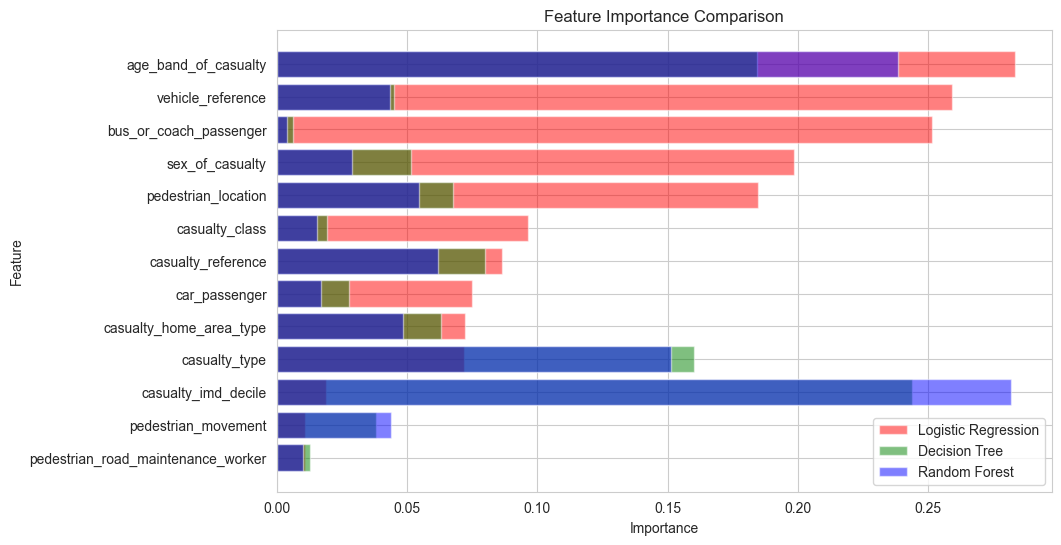

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Logistic Regression feature importance
coefficients = log_reg.coef_
avg_importance_log_reg = pd.DataFrame({'Feature': X_df.columns, 'Importance': abs(coefficients[0])})
avg_importance_log_reg = avg_importance_log_reg.sort_values('Importance', ascending=True)
ax.barh(avg_importance_log_reg['Feature'], avg_importance_log_reg['Importance'], color='r', alpha=0.5, label='Logistic Regression')

# Plot Decision Tree feature importance
feature_importance_decision_tree = pd.DataFrame({'Feature': X_df.columns, 'Importance': decision_tree.feature_importances_})
feature_importance_decision_tree = feature_importance_decision_tree.sort_values('Importance', ascending=True)
ax.barh(feature_importance_decision_tree['Feature'], feature_importance_decision_tree['Importance'], color='g', alpha=0.5, label='Decision Tree')

# Plot Random Forest feature importance
feature_importance_random_forest = pd.DataFrame({'Feature': X_df.columns, 'Importance': random_forest.feature_importances_})
feature_importance_random_forest = feature_importance_random_forest.sort_values('Importance', ascending=True)
ax.barh(feature_importance_random_forest['Feature'], feature_importance_random_forest['Importance'], color='b', alpha=0.5, label='Random Forest')

# Customize plot
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance Comparison')
ax.legend()
plt.show()

In [86]:
df.to_csv('cleaned_data.csv')